In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math
d=pd.read_csv('train.csv')
df1=pd.read_csv('test.csv')
td= pd.concat([d,df1],ignore_index=True)

In [2]:
td.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [4]:
td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(35.4)
td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(26.3)
td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(25)

td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(44)
td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(34.5)
td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(32.16)

td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("B96")
td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E101")
td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E121")

td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("C124")
td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("D")
td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("F")
# td["Embarked"]=td.Embarked.fillna("S")

In [5]:
td["Cabin"]

0          F
1        C85
2       E121
3       C123
4          F
        ... 
1304     NaN
1305    C105
1306     NaN
1307     NaN
1308     NaN
Name: Cabin, Length: 1309, dtype: object

In [6]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1223 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        982 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<Axes: xlabel='Survived', ylabel='count'>

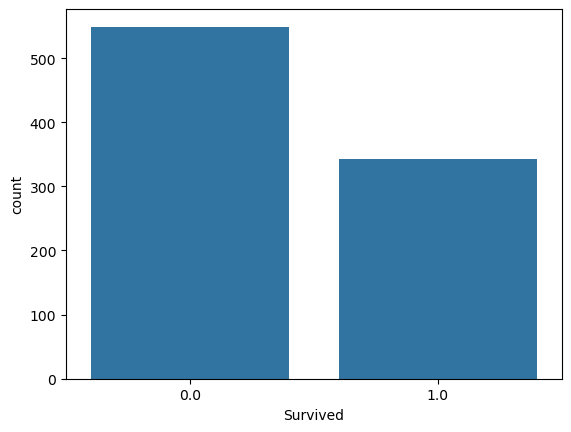

In [7]:
sb.countplot(x="Survived",data=td)

The count plot visualizes the distribution of survivors and non-survivors in the dataset, helping analyze survival trends and overall passenger survival rates.

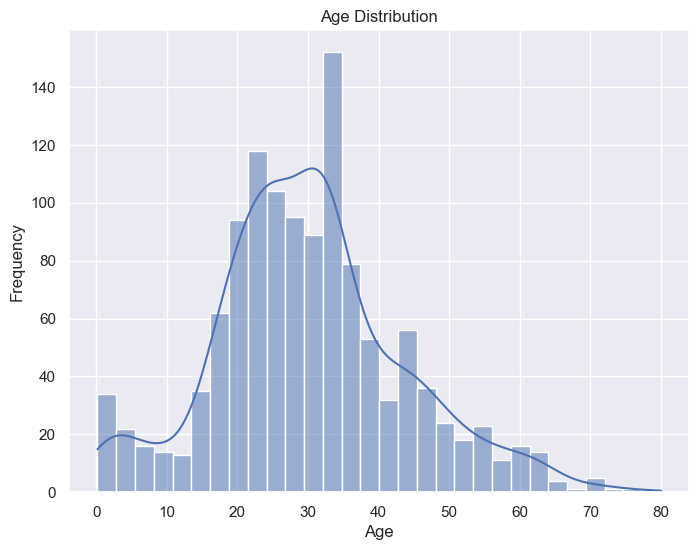

In [8]:
sb.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))

sb.histplot(td['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")  
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

The histogram visualizes the distribution of passengers' ages, showing how age groups are spread in the dataset. The KDE curve highlights trends, helping analyze common age ranges and variations.

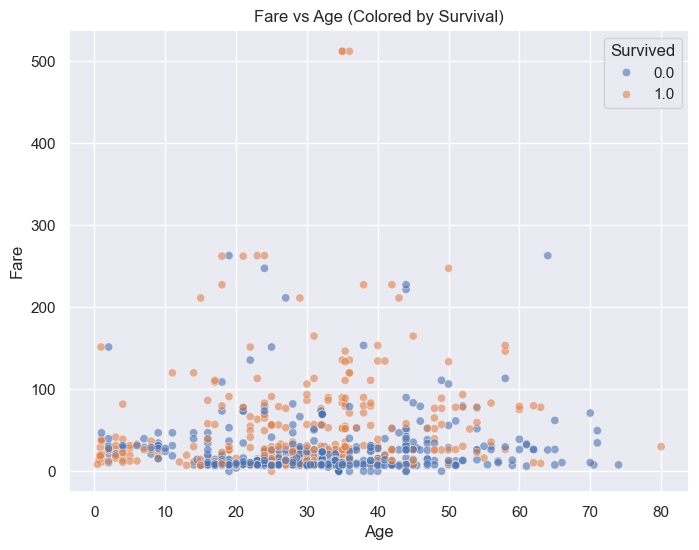

In [9]:
plt.figure(figsize=(8, 6))

sb.scatterplot(x=td['Age'], y=td['Fare'], hue=td['Survived'], alpha=0.6)
plt.title("Fare vs Age (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")

plt.show()


The scatter plot visualizes the relationship between passengers' age and fare, with colors indicating survival status. It helps analyze fare distribution across ages and how survival chances vary.

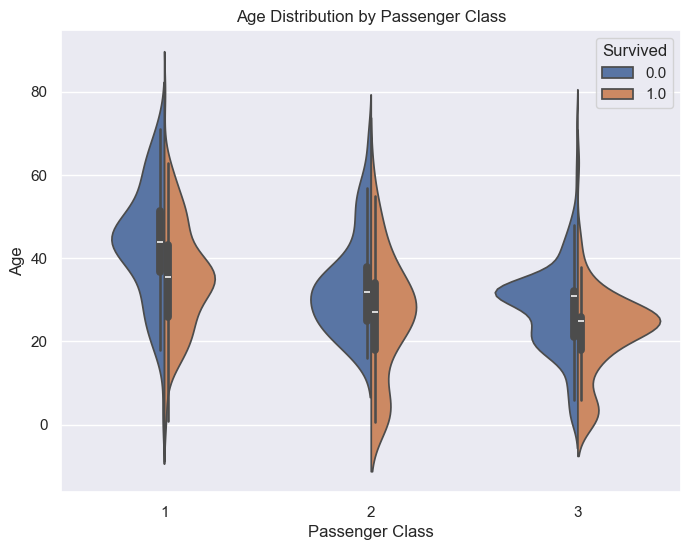

In [10]:
plt.figure(figsize=(8, 6))

sb.violinplot(x=td['Pclass'], y=td['Age'], hue=td['Survived'], split=True)
plt.title("Age Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Age")

plt.show()


The violin plot visualizes the age distribution across passenger classes, showing density variations. The split hues represent survival status, helping analyze survival trends and age differences in each class.

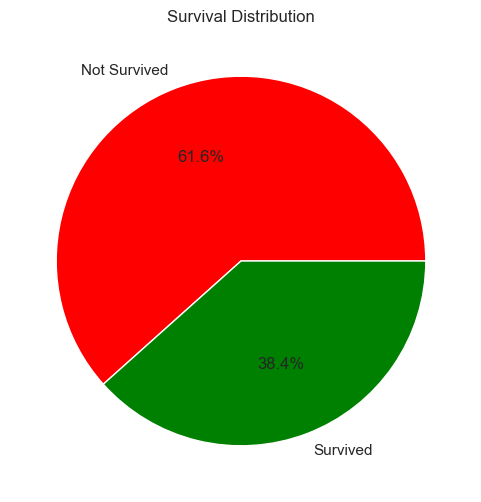

In [11]:
plt.figure(figsize=(6, 6))

survival_counts = td['Survived'].value_counts()
plt.pie(survival_counts, labels=["Not Survived", "Survived"], autopct='%1.1f%%', colors=['red', 'green'])
plt.title("Survival Distribution")

plt.show()


The pie chart represents the survival distribution, showing the percentage of passengers who survived versus those who did not, helping analyze overall survival rates in the dataset.

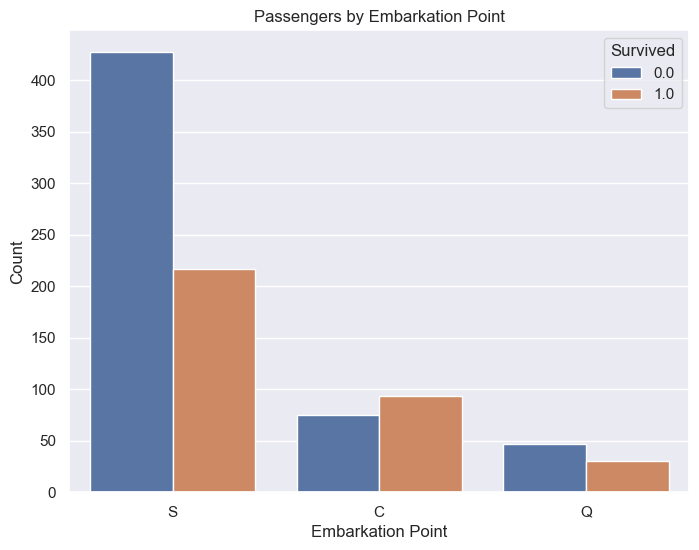

In [12]:
plt.figure(figsize=(8, 6))

sb.countplot(x=td['Embarked'], hue=td['Survived'])
plt.title("Passengers by Embarkation Point")
plt.xlabel("Embarkation Point")
plt.ylabel("Count")

plt.show()


The count plot shows the number of passengers who embarked from each location, categorized by survival status. It helps analyze survival trends based on embarkation points.

In [13]:
td["Age"].value_counts()

Age
32.16    102
25.00     68
24.00     47
22.00     43
21.00     41
        ... 
70.50      1
80.00      1
55.50      1
20.50      1
38.50      1
Name: count, Length: 101, dtype: int64

In [14]:
td["Survived"].isnull().sum()

418

<Axes: xlabel='Pclass', ylabel='count'>

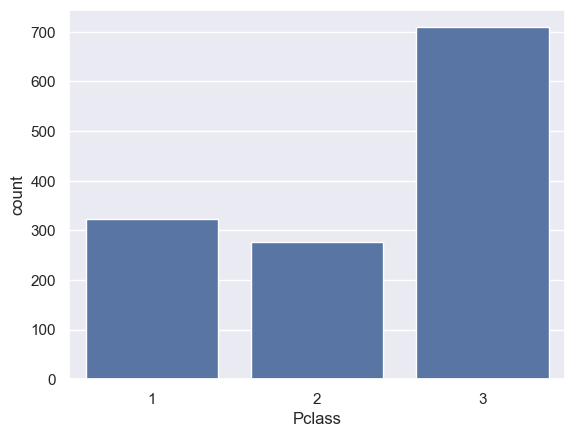

In [15]:
sb.countplot(x="Pclass", data=td)

The count plot displays the distribution of passengers across different passenger classes (Pclass), helping analyze the number of passengers in each class.

<Axes: xlabel='Pclass', ylabel='count'>

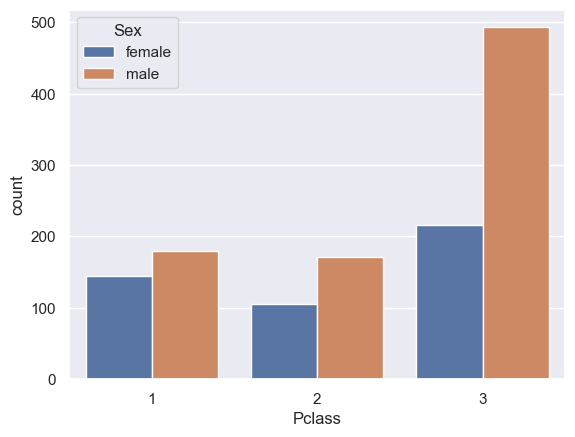

In [16]:
sb.countplot(x="Pclass", hue="Sex",data=td)

The count plot shows the distribution of passengers across different classes (Pclass) while categorizing them by gender (Sex). It helps analyze gender proportions in each class.

<Axes: xlabel='Survived', ylabel='count'>

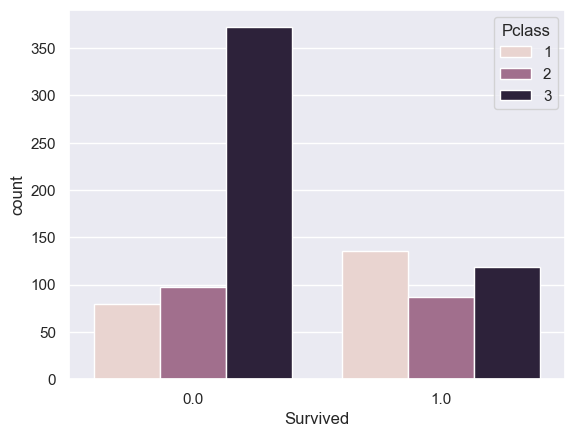

In [17]:
sb.countplot(x="Survived", hue="Pclass",data=td)

The count plot visualizes survival distribution across passenger classes (Pclass). It helps analyze how survival rates varied among different classes.

<Axes: xlabel='Survived', ylabel='count'>

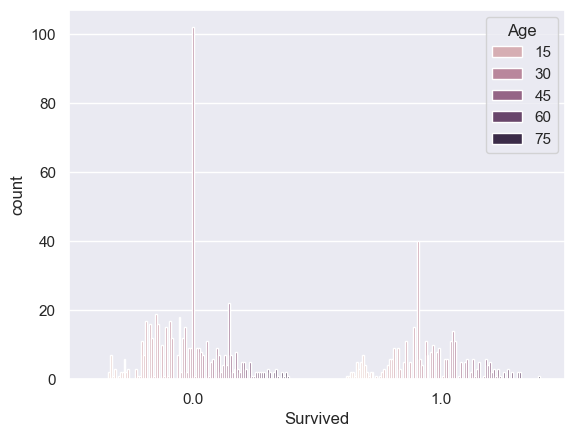

In [18]:
sb.countplot(x="Survived", hue="Age",data=td)

Since `Age` is a continuous variable, the count plot may not provide a clear visualization. However, analyzing survival based on age can help identify trends, such as higher survival rates among younger passengers.

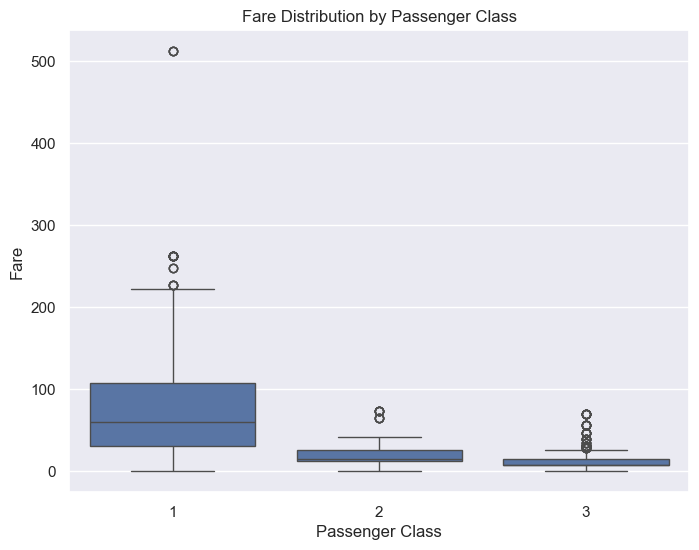

In [19]:
plt.figure(figsize=(8, 6))

sb.boxplot(x=td['Pclass'], y=td['Fare'])
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")

plt.show()


The box plot shows that higher passenger classes (Pclass 1) tend to have higher fare distributions, while lower classes (Pclass 3) generally paid less. There are also outliers in higher fare values.

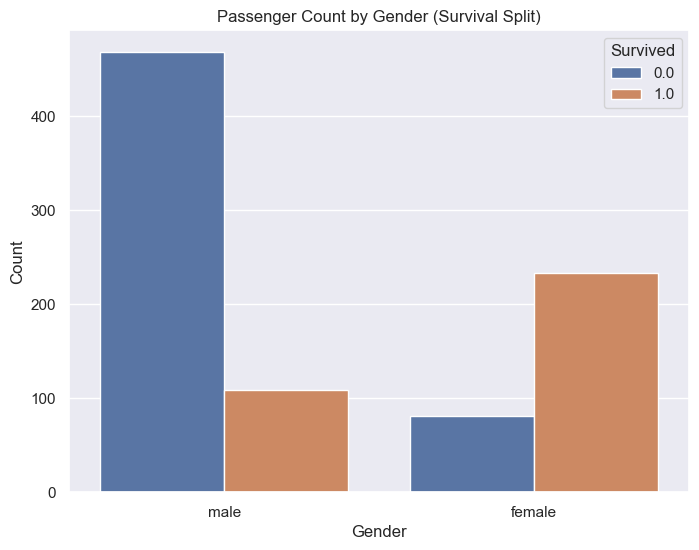

In [20]:
plt.figure(figsize=(8, 6))

sb.countplot(x=td['Sex'], hue=td['Survived'])
plt.title("Passenger Count by Gender (Survival Split)")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()


In [ ]:
The count plot indicates that more females survived compared to males. This suggests a higher survival
rate among women, likely due to evacuation priorities.

In [21]:
td.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,True,False,False,False,True,False,False,False,False,True,False
1305,False,True,False,False,False,False,False,False,False,False,False,False
1306,False,True,False,False,False,False,False,False,False,False,True,False
1307,False,True,False,False,False,True,False,False,False,False,True,False


In [22]:
td.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         2
dtype: int64

In [23]:
td["Embarked"].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [24]:
td["Cabin"].value_counts()

Cabin
F       367
E121    115
D        98
E101     77
C124     23
       ... 
E63       1
E12       1
E38       1
C111      1
C105      1
Name: count, Length: 187, dtype: int64

In [25]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1223 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        982 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [26]:
td["Survived"].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [27]:
td.dropna(inplace=True)

In [28]:
td["Survived"].value_counts()

Survived
0.0    549
1.0    340
Name: count, dtype: int64

In [29]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [30]:
td.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  889 non-null    bool 
 1   Survived     889 non-null    bool 
 2   Pclass       889 non-null    bool 
 3   Name         889 non-null    bool 
 4   Sex          889 non-null    bool 
 5   Age          889 non-null    bool 
 6   SibSp        889 non-null    bool 
 7   Parch        889 non-null    bool 
 8   Ticket       889 non-null    bool 
 9   Fare         889 non-null    bool 
 10  Cabin        889 non-null    bool 
 11  Embarked     889 non-null    bool 
dtypes: bool(12)
memory usage: 17.4 KB


In [31]:
print(td['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object


In [32]:
sex=pd.get_dummies(td['Sex'])

In [33]:
print(sex)

     female   male
0     False   True
1      True  False
2      True  False
3      True  False
4     False   True
..      ...    ...
886   False   True
887    True  False
888    True  False
889   False   True
890   False   True

[889 rows x 2 columns]


In [34]:
print(td['Cabin'])

0         F
1       C85
2      E121
3      C123
4         F
       ... 
886       D
887     B42
888       F
889    C148
890       F
Name: Cabin, Length: 889, dtype: object


In [35]:
ca=pd.get_dummies(td['Cabin'])

In [36]:
print(ca)

       A10    A14    A16    A19    A20    A23    A24    A26    A31    A32  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
886  False  False  False  False  False  False  False  False  False  False   
887  False  False  False  False  False  False  False  False  False  False   
888  False  False  False  False  False  False  False  False  False  False   
889  False  False  False  False  False  False  False  False  False  False   
890  False  False  False  False  False  False  False  False  False  False   

     ...      F  F E69  F G63  F G73     F2    F33    F38     F4     G6    

In [37]:
print(td['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object


In [38]:
emb=pd.get_dummies(td['Embarked'])

In [39]:
print(emb)

         C      Q      S
0    False  False   True
1     True  False  False
2    False  False   True
3    False  False   True
4    False  False   True
..     ...    ...    ...
886  False  False   True
887  False  False   True
888  False  False   True
889   True  False  False
890  False   True  False

[889 rows x 3 columns]


In [40]:
print(td['Pclass'])

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64


In [41]:
pcls=pd.get_dummies(td['Pclass'],prefix="Pclass")

In [42]:
print(pcls)

     Pclass_1  Pclass_2  Pclass_3
0       False     False      True
1        True     False     False
2       False     False      True
3        True     False     False
4       False     False      True
..        ...       ...       ...
886     False      True     False
887      True     False     False
888     False     False      True
889      True     False     False
890     False     False      True

[889 rows x 3 columns]


In [43]:
td.drop(["Pclass","Sex","Embarked","Cabin"],axis=1,inplace=True)

In [44]:
td=pd.concat([td,sex,emb,pcls,ca],axis=1)

In [45]:
print(td.info())

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Columns: 164 entries, PassengerId to T
dtypes: bool(156), float64(3), int64(3), object(2)
memory usage: 197.9+ KB
None


In [46]:
td.drop(["Name","PassengerId","Ticket"],axis=1,inplace=True)

In [47]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Columns: 161 entries, Survived to T
dtypes: bool(156), float64(3), int64(2)
memory usage: 177.1 KB


In [48]:
td.head(5)

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,...,F,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,0.0,22.0,1,0,7.2500,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False
1,1.0,38.0,1,0,71.2833,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,26.0,0,0,7.9250,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1.0,35.0,1,0,53.1000,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0.0,35.0,0,0,8.0500,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,False


In [49]:
X=td.drop(["Survived"],axis=1)

In [50]:
print(X)

       Age  SibSp  Parch     Fare  female   male      C      Q      S  \
0    22.00      1      0   7.2500   False   True  False  False   True   
1    38.00      1      0  71.2833    True  False   True  False  False   
2    26.00      0      0   7.9250    True  False  False  False   True   
3    35.00      1      0  53.1000    True  False  False  False   True   
4    35.00      0      0   8.0500   False   True  False  False   True   
..     ...    ...    ...      ...     ...    ...    ...    ...    ...   
886  27.00      0      0  13.0000   False   True  False  False   True   
887  19.00      0      0  30.0000    True  False  False  False   True   
888  32.16      1      2  23.4500    True  False  False  False   True   
889  26.00      0      0  30.0000   False   True   True  False  False   
890  32.00      0      0   7.7500   False   True  False   True  False   

     Pclass_1  ...      F  F E69  F G63  F G73     F2    F33    F38     F4  \
0       False  ...   True  False  False  Fals

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Columns: 160 entries, Age to T
dtypes: bool(156), float64(2), int64(2)
memory usage: 170.2 KB


In [52]:
y=td["Survived"]

In [53]:
print(y)

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 889, dtype: float64


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [56]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 121 to 37
Columns: 160 entries, Age to T
dtypes: bool(156), float64(2), int64(2)
memory usage: 136.1 KB


In [57]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 711 entries, 121 to 37
Series name: Survived
Non-Null Count  Dtype  
--------------  -----  
711 non-null    float64
dtypes: float64(1)
memory usage: 11.1 KB


In [58]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 178 entries, 387 to 234
Series name: Survived
Non-Null Count  Dtype  
--------------  -----  
178 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [59]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 387 to 234
Columns: 160 entries, Age to T
dtypes: bool(156), float64(2), int64(2)
memory usage: 34.1 KB


In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lm=LogisticRegression(max_iter=10000)

In [62]:
print(lm.fit(X_train,y_train))

LogisticRegression(max_iter=10000)


In [63]:
Predictions=lm.predict(X_test)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       105
         1.0       0.99      0.96      0.97        73

    accuracy                           0.98       178
   macro avg       0.98      0.97      0.98       178
weighted avg       0.98      0.98      0.98       178



In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
print(confusion_matrix(y_test,Predictions))

[[104   1]
 [  3  70]]


In [68]:
from sklearn.metrics import accuracy_score

In [69]:
print(accuracy_score(y_test,Predictions))

0.9775280898876404


In [70]:
#import pickle

In [71]:
# save the model to disk
#with open('Titanic','wb') as f:
#   pickle.dump(td,f)


In [72]:
Predictions

array([1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [73]:
td["Survived"].value_counts()

Survived
0.0    549
1.0    340
Name: count, dtype: int64